# ***Import Libraries***

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# Create Data to View and Fit





In [2]:
from sklearn.datasets import make_circles

# Make 1000 sample

In [3]:
n_samples  = 1000

# Make Circles

In [4]:
X,Y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [5]:
# X For Feature value 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
#Y for label Value

Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Visualize The Data

In [7]:
circles = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'Label' : Y})

In [8]:
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


# Visualize the Plot

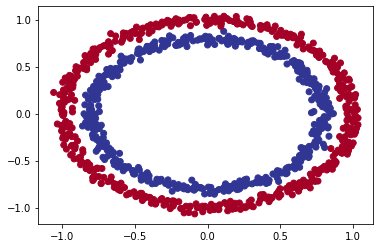

In [9]:
plt.scatter(X[:,0], X[:,1], c= Y, cmap=plt.cm.RdYlBu) # Here  Y is Label Value Not Yellow .. GOt it Mabx

In [10]:
X.shape

(1000, 2)

In [11]:
Y.shape

(1000,)

In [12]:
X[0],Y[0]

(array([0.75424625, 0.23148074]), 1)

In [13]:
len(X), len(Y)

(1000, 1000)

# Steps In Modelling 

In [14]:
tf.random.set_seed(42)



model_1 = tf.keras.Sequential([
                     tf.keras.layers.Dense(1)
])

model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X,axis=1),Y , epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 965us/step - loss: 0.5992 - mae: 0.5992
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5252 - mae: 0.5252
Epoch 3/100
32/32 [==============================] - 0s 975us/step - loss: 0.5052 - mae: 0.5052
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5001 - mae: 0.5001
Epoch 5/100
32/32 [==============================] - 0s 954us/step - loss: 0.5011 - mae: 0.5011
Epoch 6/100
32/32 [==============================] - 0s 992us/step - loss: 0.5003 - mae: 0.5003
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5009 - mae: 0.5009
Epoch 8/100
32/32 [==============================] - 0s 921us/step - loss: 0.5002 - mae: 0.5002
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5016 - mae: 0.5016
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4992 - mae: 0.4992
Epoch 11/100
32/32 [=============================

In [15]:
model_1.evaluate(X,Y)

32/32 [==============================] - 0s 758us/step - loss: 0.5001 - mae: 0.5001


[0.5001367330551147, 0.5001367330551147]

# Model No 2

In [16]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2.fit(tf.expand_dims(X,axis=1), Y, epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 1ms/step - loss: 1.8145 - accuracy: 0.4931
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7138 - accuracy: 0.5019
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.4928
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.4941
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.4898
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4921
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.4905
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.4891
Epoch 9/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6971 - accuracy: 0.4888
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4942
Epoch 11/

In [17]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5090


[0.675394594669342, 0.5090000033378601]

In [18]:
model_2.fit(tf.expand_dims(X,axis=1), Y, epochs=500, verbose=0)

In [19]:
model_2.evaluate(X,Y)

32/32 [==============================] - 0s 881us/step - loss: 0.6717 - accuracy: 0.9610


[0.6717120409011841, 0.9610000252723694]

# Model 3

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                              tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_3.fit(tf.expand_dims(X,axis=1), Y, epochs=100, verbose=0)

In [21]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 870us/step - loss: 0.6940 - accuracy: 0.5000


[0.6940136551856995, 0.5]

# Model No 4

In [22]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10 ,activation='relu'),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1 ,activation='relu') 
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

model_4.fit(tf.expand_dims(X,axis=1), Y, epochs=500, verbose=0)



In [23]:
model_4.evaluate(X,Y)

32/32 [==============================] - 0s 855us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [24]:
import numpy as np

# **Create Plot Decision Boundry Function**

In [25]:
def plot_decision_boundry(model, X,Y):
  # define axis boundry of ground and create Meshgrid

  x_min, x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
  y_min , y_max = X[:,1].min()-0.1, X[:,1].max()+0.1


  # Create Meshgird
  xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(y_min,y_max,100))


  # Create X values,(We are Going to make Predictions)

  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make Predictions

  y_pred = model.predict(x_in)

  # Check For Multiclasses 

  if len(y_pred[0]) >1:
    print('Doing Multiclass Classifications')

    # We Have To Reshape The Predictions

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
      print('Doing Binary Classifications')
      y_pred = np.round(y_pred).reshape(xx.shape)
      # Plot The Decison Boundry



      plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
      plt.scatter(X[:,0], X[:,1], c=Y, s=40, cmap= plt.cm.RdYlBu)

        # Limitations

      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())



Doing Binary Classifications


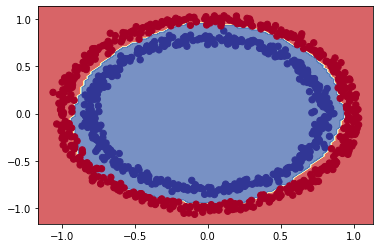

In [26]:
# Check The Prediction 


plot_decision_boundry(model=model_2, X=X, Y=Y)

Doing Binary Classifications


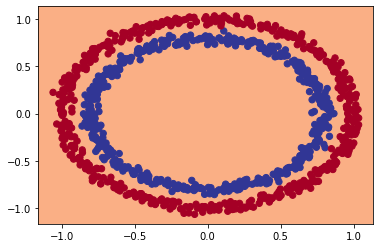

In [27]:
plot_decision_boundry(model=model_3, X=X,  Y=Y)

Doing Binary Classifications


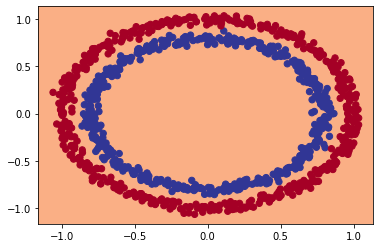

In [28]:
# Check out the predictions our model is making 
plot_decision_boundry(model=model_3, X=X,Y=Y)

In [29]:

x_min , x_max = X[:,0].min()-0.1 , X[:,0].max()+0.1
y_min , y_max = X[:,1].min()-0.1 , X[:,1].max()+0.1 

In [30]:
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [31]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max,100),
                       np.linspace(y_min,y_max,100))
xx,yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [32]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

xx,yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [33]:
x_in = np.c_[xx.ravel(), yy.ravel()]
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13600368],
       [ 1.11054797,  1.13600368],
       [ 1.13371175,  1.13600368]])

In [34]:
y_pred = model_3.predict(x_in)
y_pred

array([[0.5103687 ],
       [0.51032865],
       [0.5102885 ],
       ...,
       [0.5291199 ],
       [0.5290798 ],
       [0.5290397 ]], dtype=float32)

# Make  Our Poor Classifications Model

In [35]:
tf.random.set_seed(42)

X_regression = tf.range(0,1000,5)
Y_regression = tf.range(100, 1100, 5)


In [36]:
X_regression, Y_regression


(<tf.Tensor: shape=(200,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580,
        585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645,
        650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710,
        715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775,
        780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840,
    

# Split Regression into Train and Test Dataset

In [37]:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
Y_reg_train = Y_regression[:150]
Y_reg_test = Y_regression[150:]

In [38]:
X_reg_test, X_reg_train, Y_reg_test, Y_reg_train

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810,
        815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875,
        880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940,
        945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995], dtype=int32)>,
 <tf.Tensor: shape=(150,), dtype=int32, numpy=
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
        260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
        325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
        390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450,
        455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515,
        520, 525, 530, 53

In [39]:
# model_3.fit(tf.expand_dims(X_reg_train, axis=1), Y_reg_train, epochs=100)

# Now We Recreate The Model

In [40]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(X_reg_train, axis=1), Y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

# Make Predictions

In [41]:
y_reg_pred = model_3.predict(X_reg_test)

In [42]:
y_reg_pred.shape, X_reg_test.shape

((50, 1), TensorShape([50]))

In [43]:
y_reg_pred_squueze = tf.squeeze(y_reg_pred)

# Plot Model Predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """


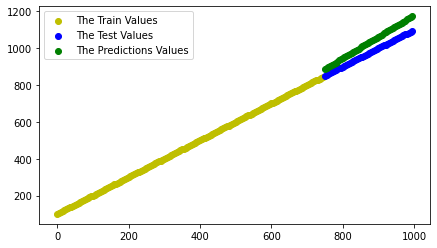

In [44]:
plt.figure(figsize=(7,4))

plt.scatter(X_reg_train, Y_reg_train, c='Y', label='The Train Values')
plt.scatter(X_reg_test, Y_reg_test, c='B', label='The Test Values')
plt.scatter(X_reg_test, y_reg_pred, c='G', label='The Predictions Values')
plt.legend()

# Visualize Plot With Squeeze value

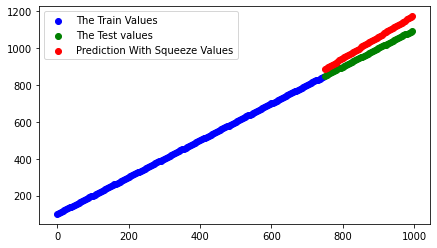

In [45]:
plt.figure(figsize=(7,4))
plt.scatter(X_reg_train, Y_reg_train, c='Blue', label='The Train Values')
plt.scatter(X_reg_test, Y_reg_test, c='Green', label='The Test values')
plt.scatter(X_reg_test, y_reg_pred_squueze, c='Red', label='Prediction With Squeeze Values')
plt.legend()

# The Missing Piece (Non Linearality)

In [46]:
tf.random.set_seed(42)


model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

model_5.fit(tf.expand_dims(X,axis=1),Y,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2948 - accuracy: 0.4997
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1731 - accuracy: 0.5002
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1752 - accuracy: 0.4979
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0436 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9939 - accuracy: 0.4955
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9648 - accuracy: 0.4977
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9204 - accuracy: 0.4964
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8385 - accuracy: 0.4984
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8108 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.6778 - accuracy: 0.5000
Epoch 11/

# Plot the Graph

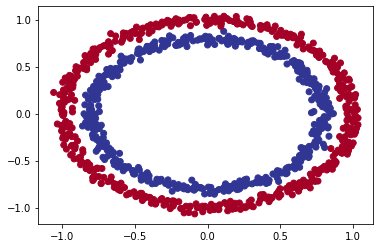

In [47]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

Doing Binary Classifications


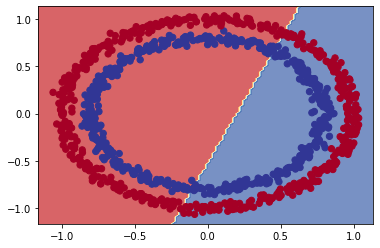

In [48]:
plot_decision_boundry(model=model_5, X=X, Y=Y)

# Another Model

In [49]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1, activation='relu')
])

model_6.compile(
    loss  = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=['accuracy']
)

history = model_6.fit(tf.expand_dims(X, axis=1),Y, epochs=500, verbose=0)

In [50]:
model_6.evaluate(X,Y)

32/32 [==============================] - 0s 904us/step - loss: 0.7031 - accuracy: 0.5000


[0.703122615814209, 0.5]

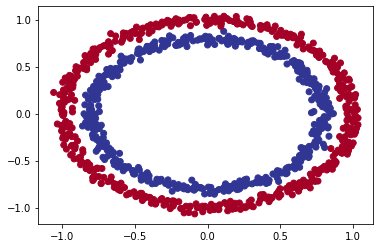

In [51]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

Doing Binary Classifications


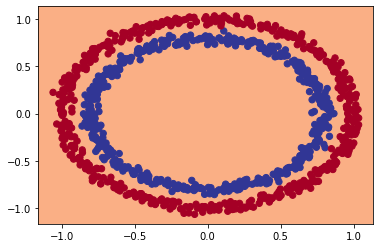

In [52]:
plot_decision_boundry(model= model_6, X=X, Y=Y)

# Model No 7

In [53]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1,activation='relu')
])

model_7.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history =   model_7.fit(tf.expand_dims(X,axis=1),Y, epochs=200, verbose=0)


In [54]:
model_7.evaluate(X,Y)

32/32 [==============================] - 0s 822us/step - loss: 0.6934 - accuracy: 0.5000


[0.693401038646698, 0.5]

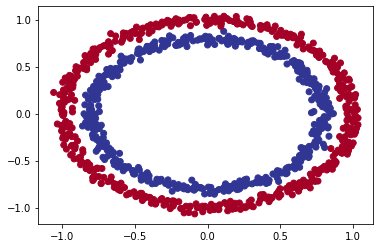

In [55]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

Doing Binary Classifications


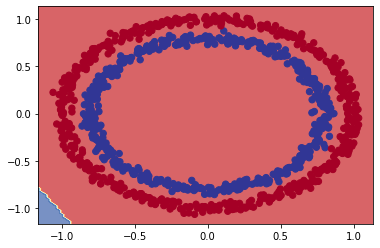

In [56]:
plot_decision_boundry(model=model_7, X=X, Y=Y)

# Model No 8

In [57]:
tf.random.set_seed(42)


model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1)
])
model_8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

model_8.fit(tf.expand_dims(X,axis=1),Y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [58]:
model_8.evaluate(X,Y)

32/32 [==============================] - 0s 854us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

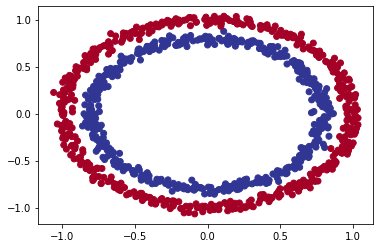

In [59]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

Doing Binary Classifications


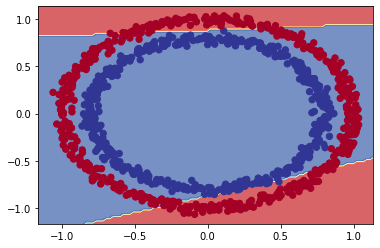

In [60]:
plot_decision_boundry(model=model_8, X=X,Y=Y)

# Model No 9

In [61]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(1),
])

model_9.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)
model_9.fit(tf.expand_dims(X, axis=1),Y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

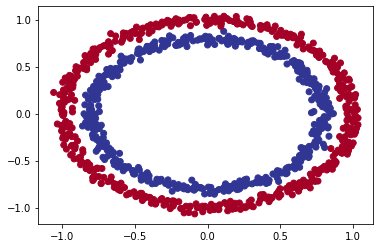

In [62]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

Doing Binary Classifications


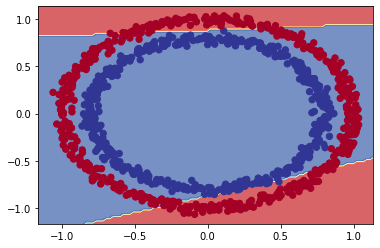

In [63]:
plot_decision_boundry(model=model_9, X=X, Y=Y)

# Model No 10

In [64]:
from keras.layers import Dense, Activation, Flatten

In [65]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.add(Flatten())

model_10.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)






model_10.fit(tf.expand_dims(X,axis=1),Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/

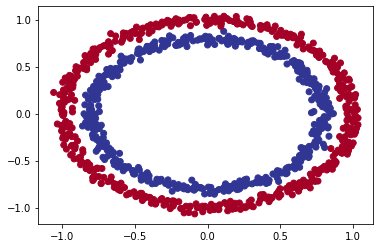

In [66]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.RdYlBu)

Doing Binary Classifications


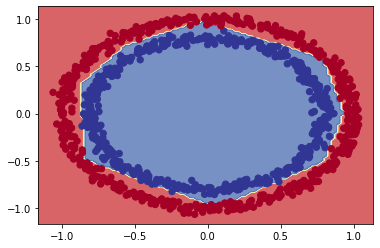

In [67]:
plot_decision_boundry(model= model_10, X=X, Y=Y)

# **Replicate Non Linear Function From Scratch**

In [68]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

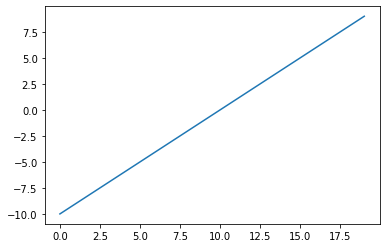

In [69]:
plt.plot(A)

In [70]:
def sigmoid(x):
  return 1/(1+tf.exp(-x))


In [71]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

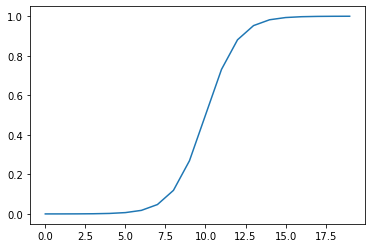

In [72]:
plt.plot(sigmoid(A))

In [73]:
def relu(x):
  return tf.maximum(0,x)

In [74]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [75]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

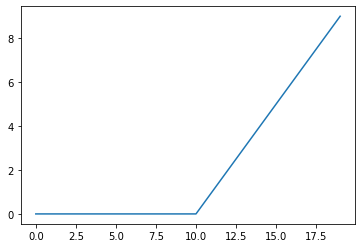

In [76]:
plt.plot(relu(A))

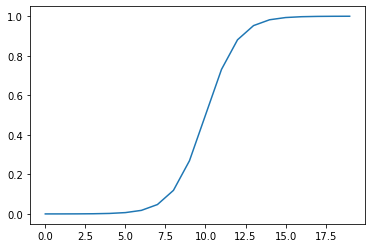

In [77]:
plt.plot(sigmoid(A))

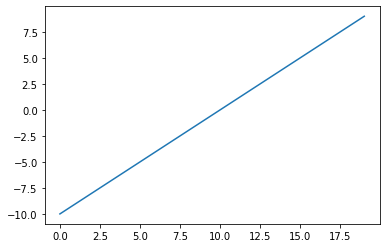

In [78]:
plt.plot(A)

In [79]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

In [80]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

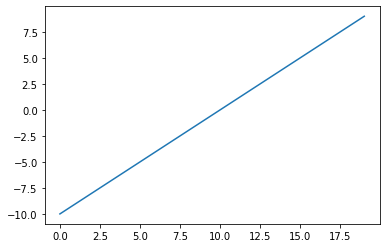

In [81]:
plt.plot(tf.keras.activations.linear(A))

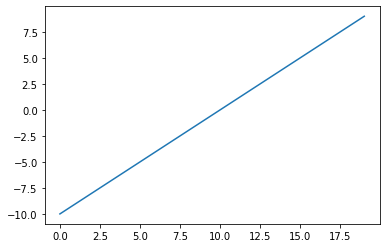

In [82]:
plt.plot(A)

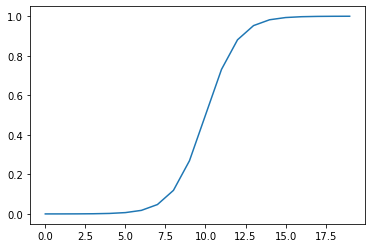

In [83]:
plt.plot(sigmoid(A))

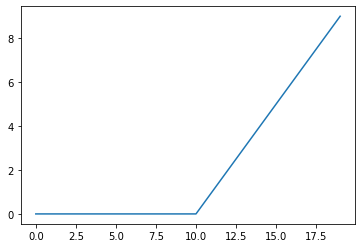

In [84]:
plt.plot(relu(A))

In [85]:
A== tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Getting Resukts With Less Time By Tweeking

In [86]:
len(X)

1000

# **Split into train and Test Datasets**

In [87]:
X_train = X[:800]
X_test =X[800:]
Y_train = Y[:800]
Y_test = Y[800:]

In [88]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

# Model No 11

In [89]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])


model_11.add(Flatten())
model_11.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history =  model_11.fit(tf.expand_dims(X_train,axis=1),Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [90]:
model_11.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468835711479187, 1.0]

# Plot The Graph

Doing Binary Classifications
Doing Binary Classifications


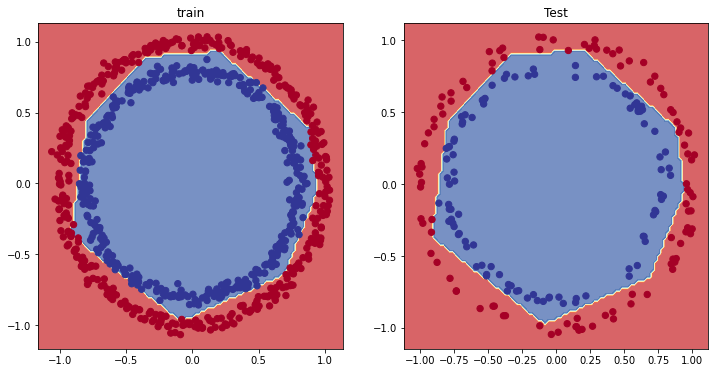

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundry(model=model_11, X=X_train,Y=Y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundry(model=model_11, X=X_test, Y=Y_test)
plt.show()

# Plot The Lost (or Training) Curves

In [92]:
history.history

{'accuracy': [0.5425000190734863,
  0.5525000095367432,
  0.5512499809265137,
  0.5774999856948853,
  0.5849999785423279,
  0.5837500095367432,
  0.675000011920929,
  0.7012500166893005,
  0.7487499713897705,
  0.7737500071525574,
  0.7649999856948853,
  0.7837499976158142,
  0.7975000143051147,
  0.8450000286102295,
  0.9125000238418579,
  0.9312499761581421,
  0.9487500190734863,
  0.9524999856948853,
  0.956250011920929,
  0.9662500023841858,
  0.9775000214576721,
  0.9737499952316284,
  0.9787499904632568,
  0.9775000214576721,
  0.9762499928474426],
 'loss': [0.6846509575843811,
  0.6777206659317017,
  0.6735942363739014,
  0.668148398399353,
  0.663268506526947,
  0.6545670032501221,
  0.6412573456764221,
  0.626427948474884,
  0.6038306951522827,
  0.5714033246040344,
  0.5404427647590637,
  0.5015037059783936,
  0.4683317542076111,
  0.41130146384239197,
  0.3625057339668274,
  0.3209041953086853,
  0.28470781445503235,
  0.2597198188304901,
  0.23746885359287262,
  0.213519454

# Convert History Objects Into DataFrame

In [93]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673594,0.55125
3,0.668148,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641257,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571403,0.77375


Text(0.5, 1.0, 'Model 11 Loss Curves')

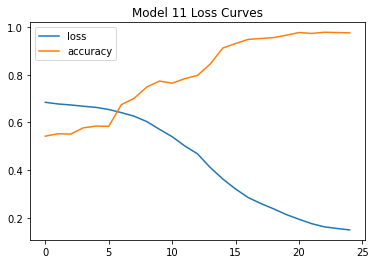

In [94]:
pd.DataFrame(history.history).plot()
plt.title('Model 11 Loss Curves')

# **CallBack Method**

# Model no 12

In [101]:
tf.random.set_seed(42)


# Create A Model


model_12 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile A Model

model_12.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_12.add(Flatten())


# Create Learning Rate Call Back

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epochs : 1e-4 * 10 ** (epochs/20))


# Fit The Model


history_12 =   model_12.fit(tf.expand_dims(X_train , axis=1), Y_train, epochs=100, callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

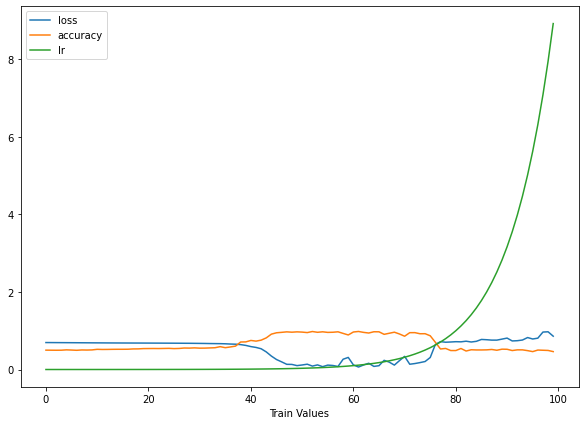

In [102]:
pd.DataFrame(history_12.history).plot(figsize=(10,7), xlabel='Train Values')

# Plot The Learning Rate Vs Loss Rate

In [103]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

# Plot The Graph

Text(0.5, 1.0, 'Learning vs Loss Rate')

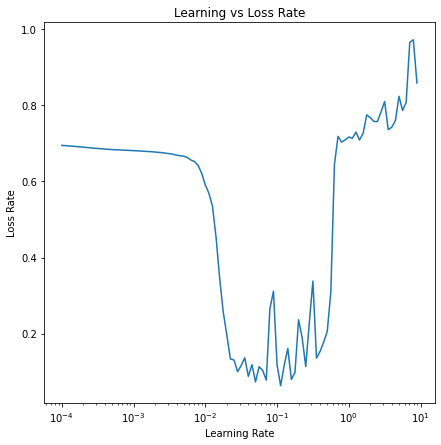

In [104]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(7,7))
plt.semilogx(lrs, history_12.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel('Loss Rate')
plt.title('Learning vs Loss Rate')


# Model No 13

In [109]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_13.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

#Create Learning Rate Call Back Function


model_13.add(Flatten())

lr_schedular_2 = tf.keras.callbacks.LearningRateScheduler( lambda epochs : 1e-4 * 10 ** (epochs/20) )


history_13 =  model_13.fit(tf.expand_dims(X_train,axis=1),Y_train, epochs=100, callbacks=[lr_schedular_2])

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 989us/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 987us/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - l

In [110]:
model_13.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4950


[0.6934717297554016, 0.4950000047683716]

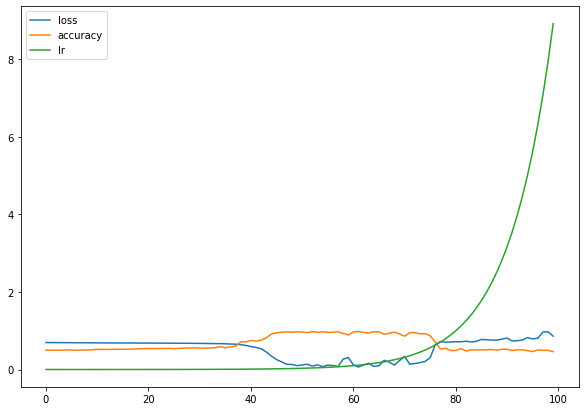

In [111]:
pd.DataFrame(history_13.history).plot(figsize=(10,7), label='Train and Test Values')

# Plot the Graph Once Again

Text(0, 0.5, 'loss value')

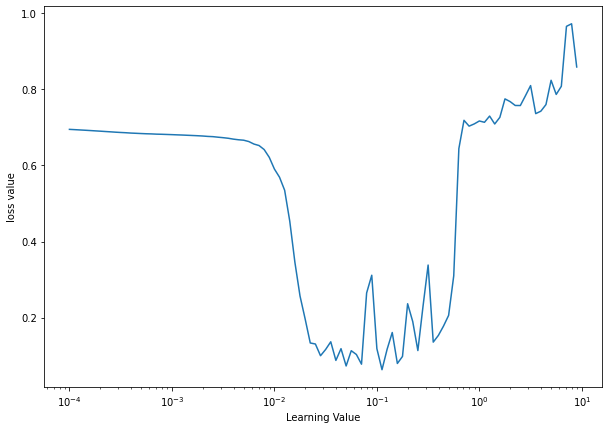

In [112]:
lrs_2 = 1e-4 * (10 ** (tf.range(100)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs_2 , history_13.history['loss'])
plt.xlabel('Learning Value')
plt.ylabel('loss value')

# Training and Evaluating Model with Ideal Output

# Model No 14

In [114]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')

])



model_14.add(Flatten())
model_14.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)

history_14 =   model_14.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6743 - accuracy: 0.5750
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/25
25/25 [

In [119]:
model_11.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468835711479187, 1.0]

In [118]:
model_14.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.9900


[0.04628557339310646, 0.9900000095367432]

# Plot The Graph

Doing Binary Classifications
Doing Binary Classifications


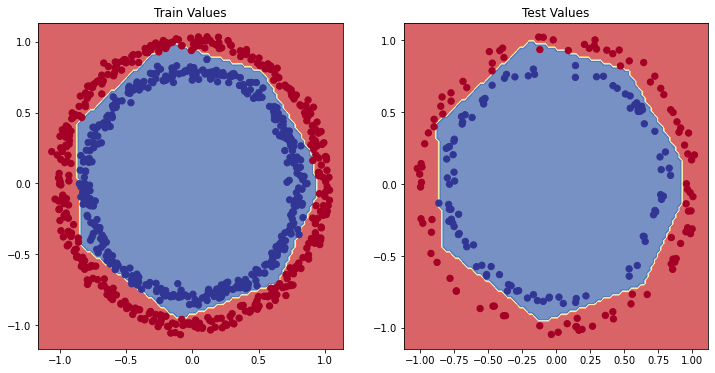

In [121]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train Values')
plot_decision_boundry(model=model_14, X=X_train, Y=Y_train),
plt.subplot(1,2,2)
plt.title('Test Values')
plot_decision_boundry(model=model_14, X=X_test, Y=Y_test)

# **Classifications Evaluations Methods**

# 1 - Accuracy

In [124]:
tf.random.set_seed(42)

model_15 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_15.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy']
)
 
model_15.add(Flatten())

history_15 =   model_15.fit(tf.expand_dims(X_train, axis=1), Y_train , epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/

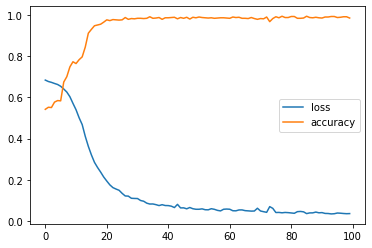

In [125]:
pd.DataFrame(history_15.history).plot()

# Precision

In [127]:
tf.random.set_seed(42)

model_16 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_16.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics=['Precision']
)

model_16.add(Flatten())

history_16  =  model_16.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6847 - precision: 0.5556 
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - precision: 0.5539
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - precision: 0.5644
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - precision: 0.5797
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - precision: 0.5839
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - precision: 0.5988
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - precision: 0.6860
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - precision: 0.7225
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - precision: 0.7415
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - precision: 0.795

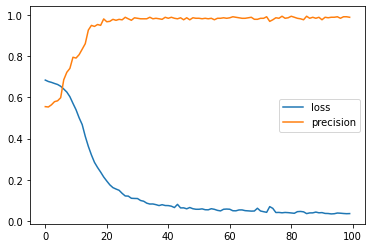

In [128]:
pd.DataFrame(history_16.history).plot()

# Recall

In [131]:
tf.random.set_seed(42)


model_17 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(4, activation='relu'),
                                tf.keras.layers.Dense(1, activation='sigmoid')
])

model_17.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['Recall']
)

model_17.add(Flatten())


history_17 =  model_17.fit(tf.expand_dims(X_train, axis=1), Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 1ms/step - loss: 0.6847 - recall: 0.4364 
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - recall: 0.5511
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6736 - recall: 0.4589
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - recall: 0.5711
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6633 - recall: 0.5985
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - recall: 0.5137
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - recall: 0.6484
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - recall: 0.6559
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - recall: 0.7656
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - recall: 0.7382
Epoch 11/100
25/25 [========

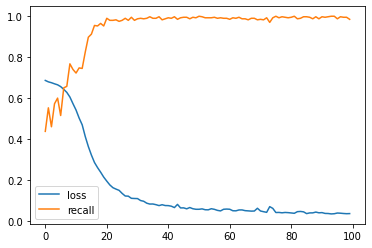

In [132]:
pd.DataFrame(history_17.history).plot()

# **Accuracy Of Classifications Models**

In [148]:
loss, accuracy = model_11.evaluate(X_test, Y_test)
print(f"Model loss on test Dataset {loss} ")
print(f"Model Accuracy on Test Dataset {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000
Model loss on test Dataset 0.12468835711479187 
Model Accuracy on Test Dataset 100.00%
